In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import class_weight

In [2]:
df = pd.read_excel('cleanData_oneHot.xlsx')
# df = pd.read_excel('cleanData2004.xlsx')
df

,age(y)_18-23,age(y)_24-29,age(y)_<18,age(y)_>29,career_crit,career_crnm,career_crwb,career_stit,career_stnm,career_stud,...,website_graphics,website_functions,duration(m)_1-6,duration(m)_7-12,duration(m)_<1,duration(m)_>12,website_function_present_attractive,website_function_present_both,website_function_present_usability,Class label
0,1,0,0,0,0,0,0,1,0,0,...,2,1,1,0,0,0,0,1,0,React
1,1,0,0,0,0,0,0,1,0,0,...,2,2,1,0,0,0,0,1,0,Vue.js
2,1,0,0,0,0,0,1,0,0,0,...,2,3,1,0,0,0,0,1,0,React
3,1,0,0,0,0,0,0,1,0,0,...,2,2,1,0,0,0,0,1,0,Vue.js
4,1,0,0,0,0,0,0,1,0,0,...,2,3,1,0,0,0,0,1,0,Angular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1,0,0,0,0,0,0,1,0,0,...,3,2,0,0,1,0,0,1,0,React
293,1,0,0,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,Vue.js
294,1,0,0,0,0,0,0,1,0,0,...,2,2,1,0,0,0,0,1,0,jQuery
295,1,0,0,0,0,0,0,1,0,0,...,2,2,0,0,1,0,0,1,0,Angular


In [3]:
x = df.iloc[:, 0:74]
y = df.iloc[:, -1]

### Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", class_weight='balanced')
clf = clf.fit(x, y)

In [5]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

y_pred = cross_val_predict(clf, x, y, cv=10)

scores = cross_val_score(clf, x, y, cv=10)
print("cross-validated scores : ", scores)

avg_score = np.mean(scores)
print("\n cross-validated avg score : ", avg_score)

confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\n", confusion_matrix)

print("\n", classification_report(y, y_pred))

cross-validated scores :  [0.33333333 0.4        0.43333333 0.2        0.43333333 0.33333333
 0.33333333 0.34482759 0.34482759 0.31034483]

 cross-validated avg score :  0.3466666666666666

 Predicted  Angular  React  Vue.js  jQuery  All
Actual                                        
Angular         15     25       9       8   57
React           23     57      32      21  133
Vue.js          11     27      16      11   65
jQuery           7     14      12       9   42
All             56    123      69      49  297

               precision    recall  f1-score   support

     Angular       0.27      0.26      0.27        57
       React       0.46      0.43      0.45       133
      Vue.js       0.23      0.25      0.24        65
      jQuery       0.18      0.21      0.20        42

    accuracy                           0.33       297
   macro avg       0.29      0.29      0.29       297
weighted avg       0.34      0.33      0.33       297



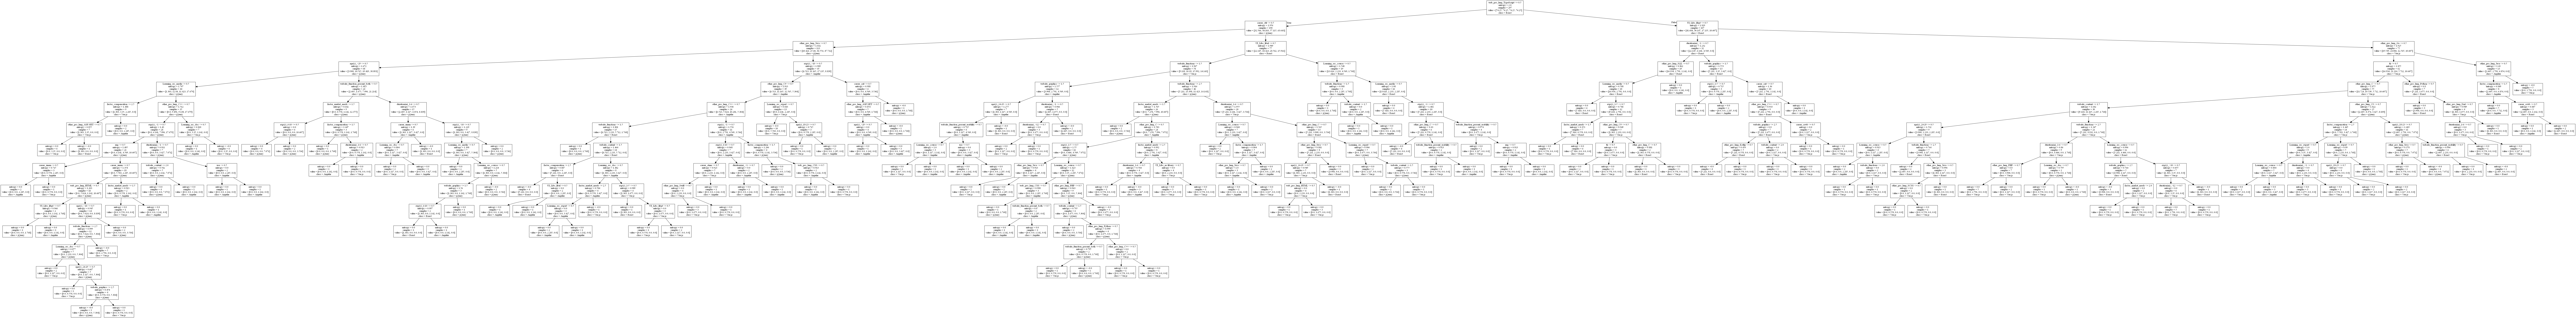

In [6]:
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

df_feature_names = x.columns
df_target_names = [str(s) for s in y.unique()]

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=df_feature_names, class_names=df_target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [7]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(x, y)
y_pred = cross_val_predict(clf, x, y, cv=10)

scores = cross_val_score(clf, x, y, cv=10)
print("cross-validated scores : ", scores)

avg_score = np.mean(scores)
print("\n cross-validated avg score : ", avg_score)

confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\n", confusion_matrix)

print("\n", classification_report(y, y_pred))

cross-validated scores :  [0.33333333 0.4        0.46666667 0.43333333 0.4        0.4
 0.43333333 0.48275862 0.24137931 0.37931034]

 cross-validated avg score :  0.3970114942528736

 Predicted  Angular  React  Vue.js  jQuery  All
Actual                                        
Angular         16     28       9       4   57
React           17     89      20       7  133
Vue.js           6     38      14       7   65
jQuery           4     29       9       0   42
All             43    184      52      18  297

               precision    recall  f1-score   support

     Angular       0.37      0.28      0.32        57
       React       0.48      0.67      0.56       133
      Vue.js       0.27      0.22      0.24        65
      jQuery       0.00      0.00      0.00        42

    accuracy                           0.40       297
   macro avg       0.28      0.29      0.28       297
weighted avg       0.35      0.40      0.37       297



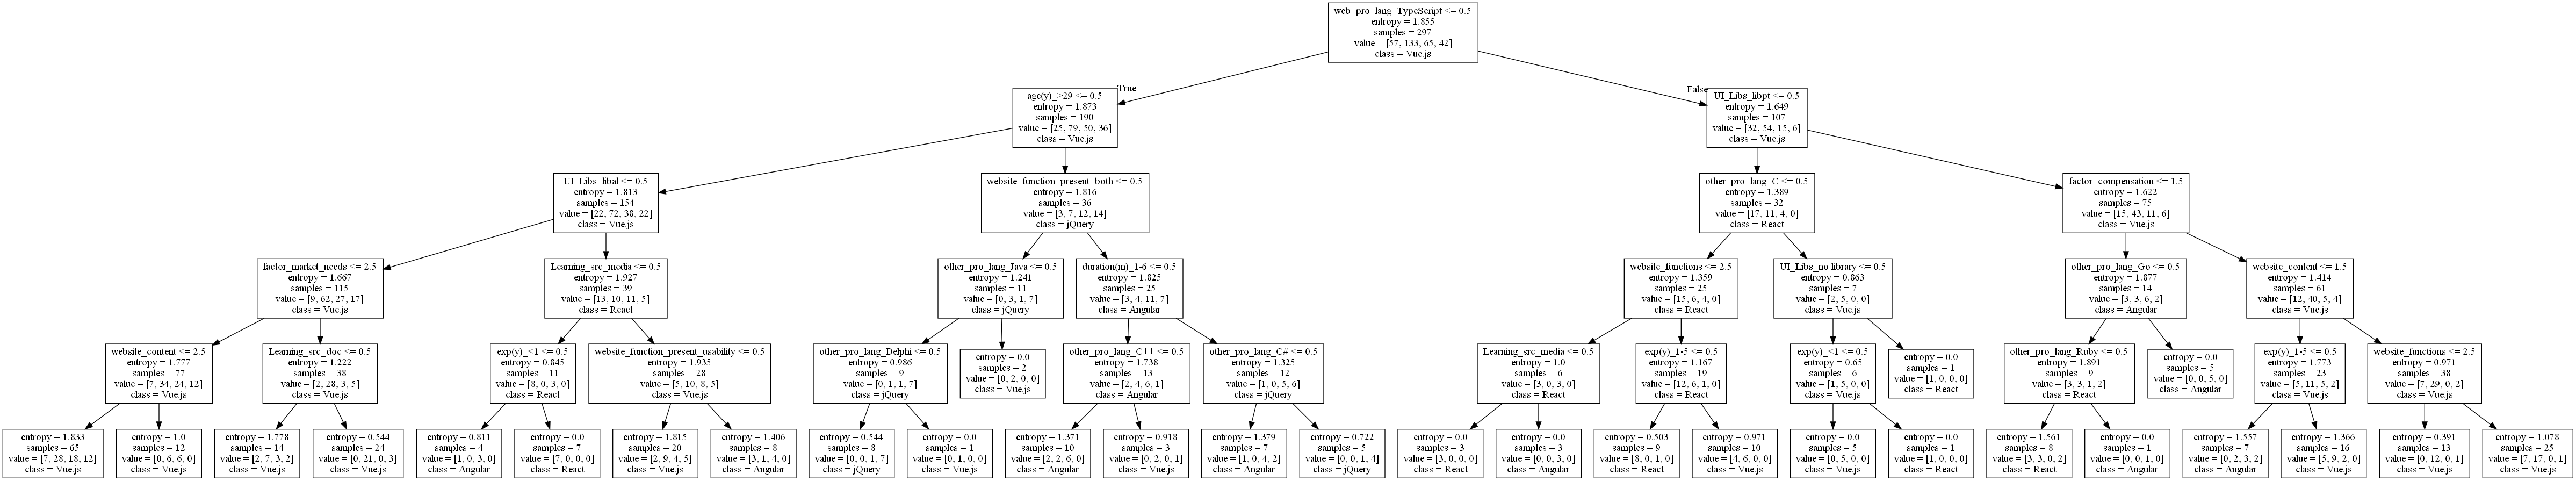

In [8]:
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

df_feature_names = x.columns
df_target_names = [str(s) for s in y.unique()]

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=df_feature_names, class_names=df_target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### SVM

In [9]:
from sklearn import svm

clf_svm = svm.SVC(class_weight='balanced')
clf_svm.fit(x,y)

SVC(class_weight='balanced')

In [10]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

y_pred = cross_val_predict(clf_svm, x, y, cv=10)

scores = cross_val_score(clf_svm, x, y, cv=10)
print("cross-validated scores : ", scores)

avg_score = np.mean(scores)
print("\ncross-validated avg score : ", avg_score)

confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\n", confusion_matrix)

print("\n", classification_report(y, y_pred))

cross-validated scores :  [0.36666667 0.4        0.33333333 0.43333333 0.36666667 0.43333333
 0.36666667 0.55172414 0.37931034 0.34482759]

cross-validated avg score :  0.3975862068965517

 Predicted  Angular  React  Vue.js  jQuery  All
Actual                                        
Angular         22     13      16       6   57
React           15     69      23      26  133
Vue.js          11     21      16      17   65
jQuery           2     15      14      11   42
All             50    118      69      60  297

               precision    recall  f1-score   support

     Angular       0.44      0.39      0.41        57
       React       0.58      0.52      0.55       133
      Vue.js       0.23      0.25      0.24        65
      jQuery       0.18      0.26      0.22        42

    accuracy                           0.40       297
   macro avg       0.36      0.35      0.35       297
weighted avg       0.42      0.40      0.41       297



### KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform')
clf_knn.fit(x,y)

KNeighborsClassifier(metric='euclidean')

In [12]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

y_pred = cross_val_predict(clf_knn, x, y, cv=10)

scores = cross_val_score(clf_knn, x, y, cv=10)
print("cross-validated scores : ", scores)

avg_score = np.mean(scores)
print("\ncross-validated avg score : ", avg_score)

confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\n", confusion_matrix)

print("\n", classification_report(y, y_pred))

cross-validated scores :  [0.4        0.4        0.23333333 0.43333333 0.43333333 0.4
 0.5        0.44827586 0.48275862 0.27586207]

cross-validated avg score :  0.4006896551724138

 Predicted  Angular  React  Vue.js  jQuery  All
Actual                                        
Angular         19     34       4       0   57
React           23     88      11      11  133
Vue.js          16     38       5       6   65
jQuery           4     24       7       7   42
All             62    184      27      24  297

               precision    recall  f1-score   support

     Angular       0.31      0.33      0.32        57
       React       0.48      0.66      0.56       133
      Vue.js       0.19      0.08      0.11        65
      jQuery       0.29      0.17      0.21        42

    accuracy                           0.40       297
   macro avg       0.32      0.31      0.30       297
weighted avg       0.35      0.40      0.36       297



### Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.class_weight import compute_sample_weight

weight_balanced = compute_sample_weight(class_weight='balanced', y=y)

clf_naive = GaussianNB()
clf_naive.fit(x,y, sample_weight=weight_balanced)

GaussianNB()

In [14]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

y_pred = cross_val_predict(clf_naive, x, y, cv=10)

scores = cross_val_score(clf_naive, x, y, cv=10)
print("cross-validated scores : ", scores)

avg_score = np.mean(scores)
print("\ncross-validated avg score : ", avg_score)

confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\n", confusion_matrix)

print("\n", classification_report(y, y_pred))

cross-validated scores :  [0.2        0.3        0.2        0.3        0.23333333 0.13333333
 0.2        0.20689655 0.31034483 0.24137931]

cross-validated avg score :  0.2325287356321839

 Predicted  Angular  React  Vue.js  jQuery  All
Actual                                        
Angular         50      0       1       6   57
React          101      6       8      18  133
Vue.js          44      3       5      13   65
jQuery          30      2       2       8   42
All            225     11      16      45  297

               precision    recall  f1-score   support

     Angular       0.22      0.88      0.35        57
       React       0.55      0.05      0.08       133
      Vue.js       0.31      0.08      0.12        65
      jQuery       0.18      0.19      0.18        42

    accuracy                           0.23       297
   macro avg       0.31      0.30      0.19       297
weighted avg       0.38      0.23      0.16       297



------

In [20]:
import pickle

In [21]:
pkl_filename = "front_end_model.pkl"

with open(pkl_filename, 'wb') as file:
  pickle.dump(clf, file)